# Demonstration of Forward Modeling
This notebook demonstrates the basic forward modeling functionality of GDTchron. It creates a time-temperature (t-T) path, forward models AHe, AFT, and ZHe ages, and plots the results in the figure used in the accompanying manuscript

In [1]:
# Imports
import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
import numpy as np

from gdtchron import aft, he

The cell below creates a t-T path in which a rock is 100°C at 35 Ma, then at 15 Ma begins cooling to 0°C over 4 Myr (25°C/Myr)

Text(0, 0.5, 'Temperature (C)')

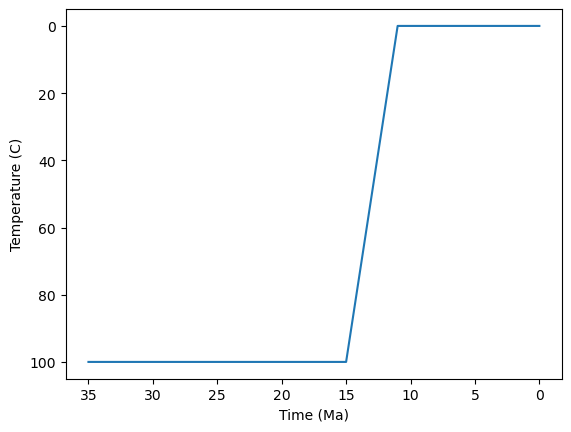

In [2]:
# Define t-T path
start_t = 100 + 273  # K
end_t = 0 + 273  # K

static_start = np.ones(20) * start_t  # 100 degC for 20 Myr
cooling = np.linspace(start_t, end_t, 5)  # Cooling to 0 degC over 4 Myr
static_end = np.ones(11) * end_t  # 0 deg C for 11 Myr

temps = np.concatenate([static_start, cooling, static_end])  # K

time = np.arange(35, 0 - 1, -1)

plt.plot(time, temps - 273)  # degC
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Time (Ma)')
plt.ylabel('Temperature (C)')

The cell below uses GDTchron to get He ages (both apatite and zircon) from this t-T path. Note that the U and Th concentrations, as well as the radius of the crystal, need to be specified for modeling.

In [3]:
# Calculate AHe and ZHe ages
results_ahe = he.forward_model_he(temps=temps, tsteps=time, system='AHe', u=100, th=100,
                                  radius=50)

print('AHe Age: ', round(results_ahe[0], 2), ' Ma')

results_zhe = he.forward_model_he(temps=temps, tsteps=time, system='ZHe', u=100, th=100,
                                  radius=50)

print('ZHe Age: ', round(results_zhe[0], 2), ' Ma')


AHe Age:  13.9  Ma
ZHe Age:  34.76  Ma


The cell below plots normalized He concentration as a function of the radius of the crystal for both apatite and zircon.

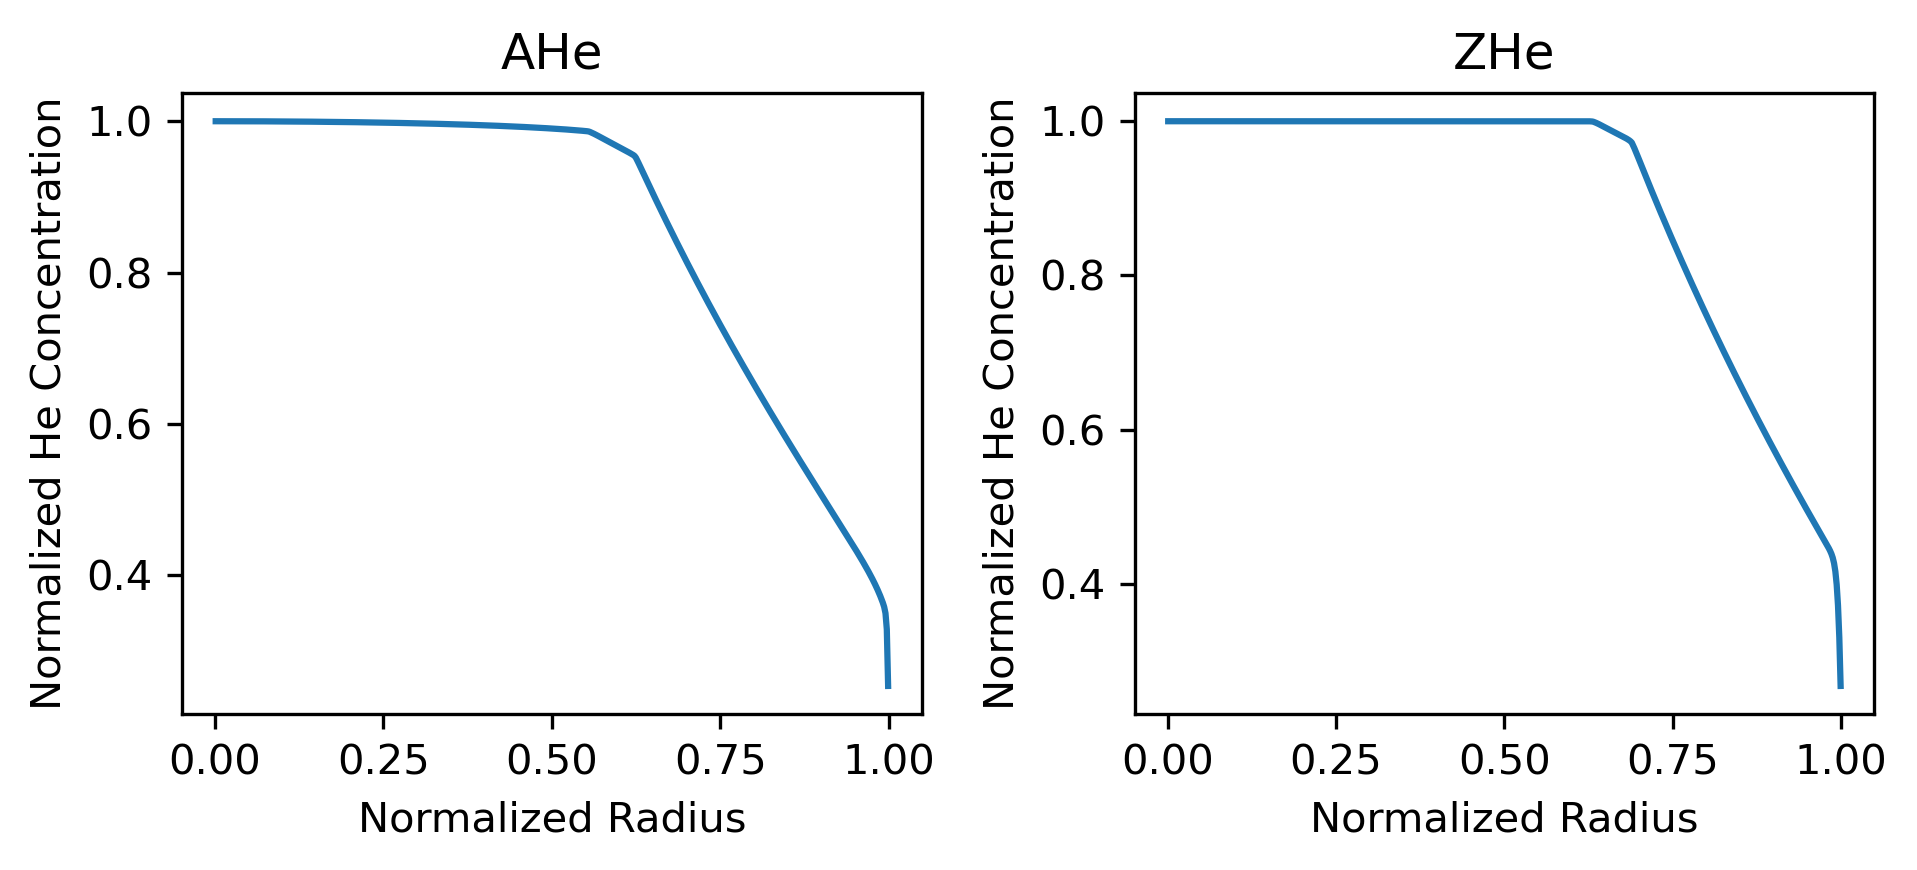

In [4]:
# Plot Profiles
fig, axs = plt.subplots(1, 2, dpi=300, figsize=(6.5, 3))

ahe_positions = results_ahe[3]
ahe_volumes = results_ahe[4]

axs[0].plot(ahe_positions, ahe_volumes)
axs[0].set_title('AHe')

zhe_positions = results_zhe[3]
zhe_volumes = results_zhe[4]

axs[1].plot(zhe_positions, zhe_volumes)
axs[1].set_title('ZHe')

for ax in axs:
    ax.set_xlabel('Normalized Radius')
    ax.set_ylabel('Normalized He Concentration')

plt.tight_layout()


The cell below calculates an age and track length distribution for the AFT system. The track length distribution is then plotted. Note that the etch parameter Dpar must be specified for modeling.

AFT Age:  21.26  Ma


Text(0, 0.5, 'Frequency')

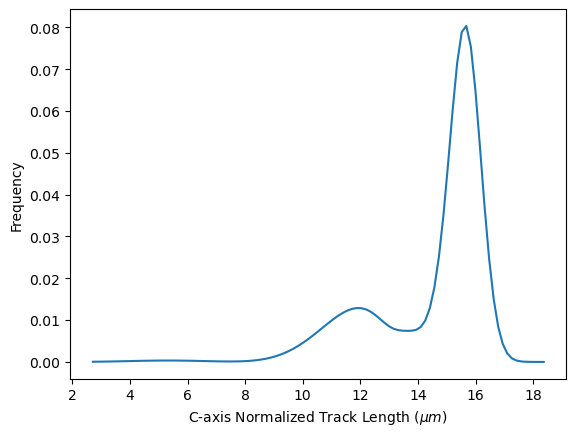

In [5]:
# Calculate AFT ages
results_aft = aft.forward_model_aft(temps=temps, tsteps=time, dpar=1.75, 
                                    get_lengths=True, make_graph=True)

print('AFT Age: ', round(results_aft[0], 2), ' Ma')

length_results = results_aft[1]
lengths, freqs = length_results[2], length_results[3]

plt.plot(lengths, freqs)

plt.xlabel(r'C-axis Normalized Track Length ($\mu m$)')
plt.ylabel('Frequency')

The cells below just plot the same information for a publication-ready figure.

In [6]:
# Set up plotting colormaps
ahe_cmap = cmc.devon
aft_cmap = cmc.lajolla
zhe_cmap = cmc.bamako
cat_cmap = cmc.batlowS

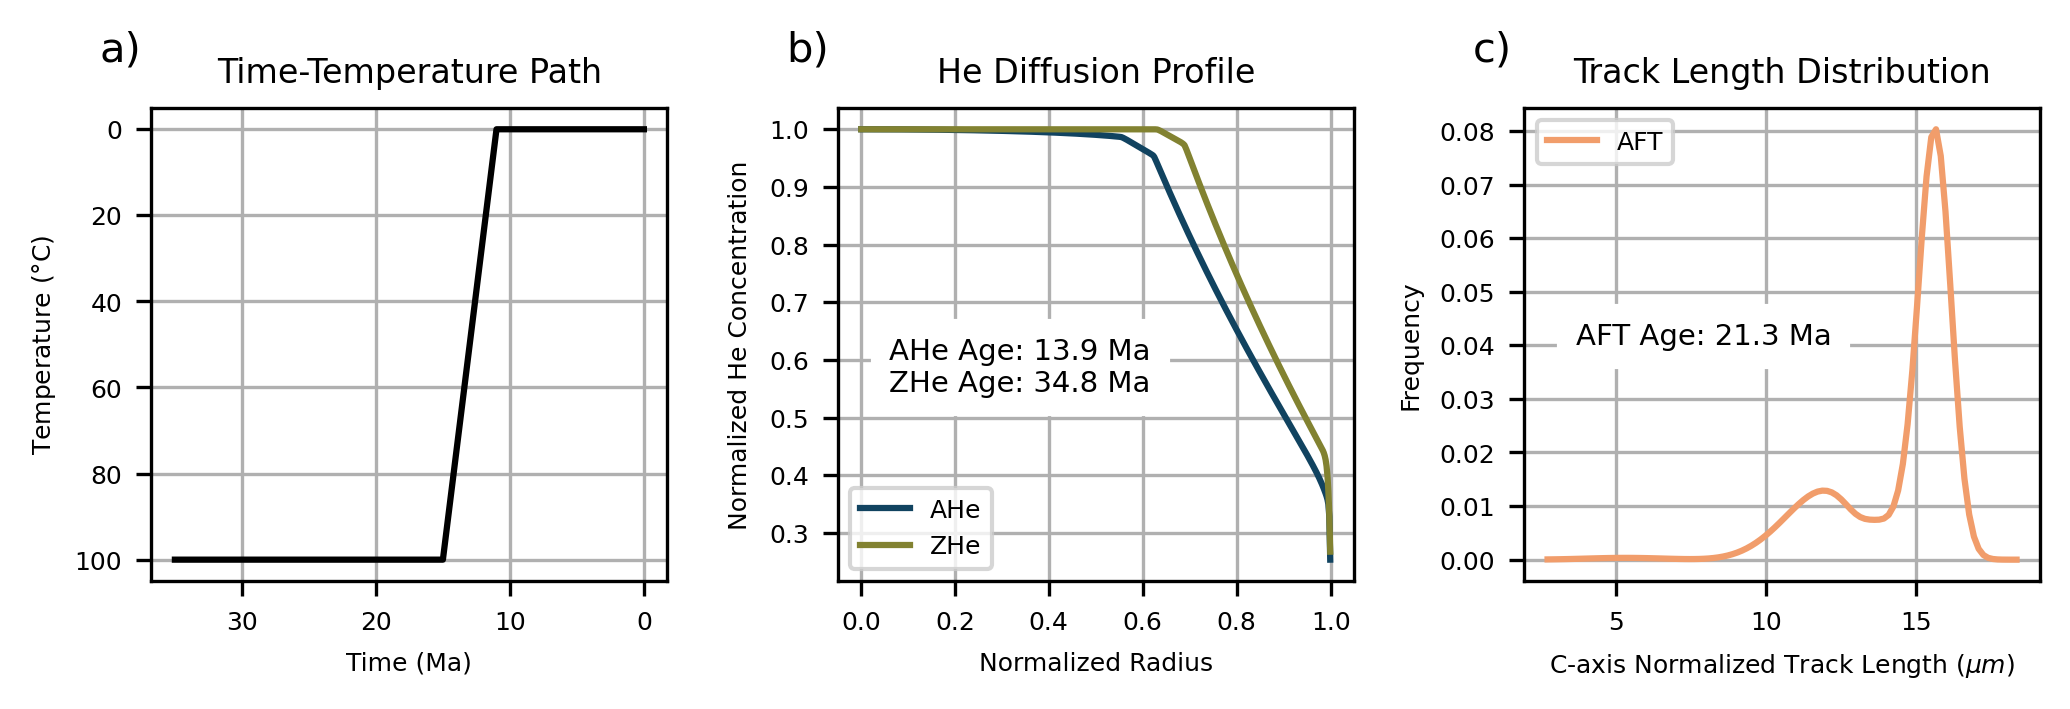

In [7]:
# Put everything together into a nice figure
fig, axs = plt.subplots(1, 3, dpi=300, figsize=(7, 2.5))

axs[0].plot(time, temps - 273, c='black')  # degC
axs[0].invert_xaxis()
axs[0].invert_yaxis()
axs[0].set_xlabel('Time (Ma)', fontsize=6)
axs[0].set_ylabel(r'Temperature ($\degree$C)', fontsize=6)
axs[0].set_title('Time-Temperature Path', fontsize=8)

axs[1].plot(ahe_positions, ahe_volumes, c=cat_cmap.colors[6], label='AHe')
axs[1].plot(zhe_positions, zhe_volumes, c=cat_cmap.colors[2], label='ZHe')
axs[1].set_xlabel('Normalized Radius', fontsize=6)
axs[1].set_ylabel('Normalized He Concentration', fontsize=6)
axs[1].legend(fontsize=6)
axs[1].set_title('He Diffusion Profile', fontsize=8)

ahe_text = 'AHe Age: ' + str(round(results_ahe[0], 1)) + ' Ma'
zhe_text = 'ZHe Age: ' + str(round(results_zhe[0], 1)) + ' Ma'
aft_text = 'AFT Age: ' + str(round(results_aft[0], 1)) + ' Ma'

bbox = {'facecolor': 'white', 'edgecolor': 'white'}

axs[1].annotate(ahe_text + '\n' + zhe_text, (0.1, 0.4), xycoords='axes fraction', 
                fontsize=7, bbox=bbox)
axs[2].annotate(aft_text, (0.1, 0.5), xycoords='axes fraction', fontsize=7, bbox=bbox)

axs[2].plot(lengths, freqs, c=cat_cmap.colors[4], label='AFT')
axs[2].set_xlabel(r'C-axis Normalized Track Length ($\mu m$)', fontsize=6)
axs[2].set_ylabel('Frequency', fontsize=6)
axs[2].legend(fontsize=6)
axs[2].set_title('Track Length Distribution', fontsize=8)

for k, ax in enumerate(axs):
    ax.tick_params(axis='both', labelsize=6)
    ax.grid(True)
    ax.annotate(chr(97 + k) + ')', (-0.1, 1.1), xycoords='axes fraction', fontsize=10) 

plt.tight_layout()
fig.savefig('tchron_demo.jpg')